In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
#%matplotlib inline     
#%matplotlib notebook
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr #, GPDC, CMIknn, CMIsymb

In [2]:
df = pd.read_csv('data/covid-ger-extended-trim.csv')
df = df.drop('bedover_mean', axis=1)
df = df.drop('icuover_mean', axis=1)
var_names = list(df.columns)
dataframe = pp.DataFrame(df.to_numpy(), var_names=var_names)
df

,stay_home_states,educational_fac_states,any_gathering_states,any_business_states,all_non-ess_business_states,allbed_mean,ICUbed_mean,InvVen_mean,admis_mean,newICU_mean,deaths_mean,totdea_mean,mobility_composite,total_tests,confirmed_infections,est_infections_mean
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,9.808164,1697.981918,0.0,8.664106
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,9.357842,1851.950254,0.0,10.731048
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.857482,2012.716767,0.0,13.267478
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.301529,2186.275145,0.0,16.365240
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,7.683802,2379.883564,2.0,20.134492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.0,10.0,15.0,16.0,0.0,92.320134,46.187902,44.289079,13.332306,7.134462,12.0,8973.0,-17.807644,65316.904271,46383.0,845.442768
144,0.0,10.0,15.0,16.0,0.0,90.356144,45.143859,43.284896,13.185375,7.139011,12.0,8985.0,-18.072359,65735.602375,466.0,854.000530
145,0.0,10.0,15.0,16.0,0.0,88.523334,44.102158,42.278382,13.291748,7.147999,9.0,8994.0,-18.249516,66154.300479,503.0,861.610036
146,0.0,10.0,15.0,16.0,0.0,87.258705,44.051532,42.274999,12.994335,7.142314,9.0,9003.0,-18.324832,66572.998584,446.0,867.420018


In [3]:
df.describe()

,stay_home_states,educational_fac_states,any_gathering_states,any_business_states,all_non-ess_business_states,allbed_mean,ICUbed_mean,InvVen_mean,admis_mean,newICU_mean,deaths_mean,totdea_mean,mobility_composite,total_tests,confirmed_infections,est_infections_mean
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,5.155405,10.594595,11.209459,11.858108,2.425676,742.735735,375.607471,361.932490,112.668812,61.308643,60.878378,4275.060811,-26.825665,42884.827224,2341.412162,5258.381396
std,7.064054,6.479521,7.111602,6.622997,4.607139,900.616827,455.884870,440.727380,137.687946,74.884385,78.947145,3731.044953,19.436796,19743.242785,6142.918969,6145.745423
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-61.218698,1697.981918,0.000000,8.664106
25%,0.000000,7.500000,0.000000,6.000000,0.000000,82.876679,42.141992,40.719246,13.068418,7.137874,1.750000,11.000000,-42.610996,33590.321240,238.500000,809.651504
50%,0.000000,13.000000,16.000000,16.000000,0.000000,288.562408,144.153980,136.632750,43.080371,23.391519,24.000000,4732.500000,-26.913421,50748.001335,681.000000,2014.765155
75%,15.000000,16.000000,16.000000,16.000000,1.000000,1233.766074,622.208723,607.102665,182.650852,99.868203,101.500000,8223.750000,-15.770441,55163.044007,2337.500000,8487.846954
max,16.000000,16.000000,16.000000,16.000000,12.000000,2783.641147,1410.364618,1365.893859,429.149219,233.584724,314.000000,9010.000000,9.808164,66991.696688,46383.000000,19351.169855


In [4]:
parcorr = ParCorr()
pcmci = PCMCI(dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)

In [6]:
pcmci.verbosity = 1
results = pcmci.run_pcmci(tau_max=8, pc_alpha=None)


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 8
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable stay_home_states has 10 parent(s):
    [pc_alpha = 0.5]
        (stay_home_states -1): max_pval = 0.00000, min_val =  0.819
        (stay_home_states -3): max_pval = 0.01296, min_val = -0.217
        (educational_fac_states -8): max_pval = 0.09079, min_val = -0.150
        (any_gathering_states -3): max_pval = 0.29718, min_val =  0.094
        (any_gathering_states -2): max_pval = 0.34252, min_val = -0.084
        (mobility_composite -2): max_pval = 0.40603, min_val = -0.075
        (all_non-ess_business_states -1): max_pval = 0.46376, min_val = -0.066
        (admis_mean -2): max_pval = 0.46940, min_val =  0.065
        (newICU_mean -2): max_pval = 0.48846, min_val =  0.062
        (mobility_composite -8): max_pval = 0.49009, 


## Significant links at alpha = 0.05:

    Variable stay_home_states has 18 link(s):
        (stay_home_states -1): pval = 0.00000 | val =  0.715
        (any_business_states -7): pval = 0.00000 | val =  0.476
        (educational_fac_states -6): pval = 0.00000 | val =  0.456
        (any_business_states -8): pval = 0.00013 | val =  0.357
        (educational_fac_states -5): pval = 0.00109 | val =  0.300
        (est_infections_mean -8): pval = 0.00177 | val =  0.292
        (any_gathering_states  0): pval = 0.00191 | val =  0.290
        (stay_home_states -3): pval = 0.00276 | val = -0.279
        (stay_home_states -6): pval = 0.00326 | val = -0.274
        (educational_fac_states -8): pval = 0.00292 | val = -0.273
        (educational_fac_states -2): pval = 0.00391 | val = -0.266
        (est_infections_mean -6): pval = 0.00877 | val =  0.247
        (est_infections_mean -7): pval = 0.00926 | val =  0.245
        (total_tests -7): pval = 0.00894 | val = -0.244
        (stay_home_sta

As you can see from the output, PCMCI selected different ``pc_alpha`` for each variable. The result of ``run_pcmci`` is a dictionary containing the matrix of p-values, the matrix of test statistic values (here MCI partial correlations), and optionally its confidence bounds (can be specified upon initializing ``ParCorr``). ``p_matrix`` and ``val_matrix`` are of shape ``(N, N, tau_max+1)`` with entry ``(i, j, \tau)`` denoting the test for the link $X^i_{t-\tau} \to X^j_t$. The MCI values for $\tau=0$ do not exclude other contemporaneous effects, only past variables are conditioned upon.

In [11]:
print("p-values")
print (results['p_matrix'].round(3))
print("MCI partial correlations")
print (results['val_matrix'].round(2))

p-values
[[[1.    0.    0.043 ... 0.003 0.705 0.159]
  [0.894 0.332 0.982 ... 0.599 0.518 0.729]
  [0.002 0.252 0.787 ... 0.55  0.019 0.265]
  ...
  [0.645 0.889 0.931 ... 0.672 0.96  0.797]
  [0.583 0.292 0.71  ... 0.8   0.518 0.549]
  [0.419 0.275 0.353 ... 0.956 0.765 0.973]]

 [[0.894 0.765 0.004 ... 0.    0.517 0.003]
  [1.    0.    0.488 ... 0.808 0.059 0.524]
  [0.801 0.081 0.002 ... 0.146 0.    0.   ]
  ...
  [0.193 0.051 0.5   ... 0.726 0.833 0.899]
  [0.787 0.384 0.854 ... 0.869 0.912 0.785]
  [0.216 0.124 0.173 ... 0.804 0.66  0.581]]

 [[0.002 0.361 0.041 ... 0.595 0.208 0.919]
  [0.801 0.622 0.861 ... 0.954 0.508 0.863]
  [1.    0.    0.    ... 0.455 0.285 0.591]
  ...
  [0.853 0.82  0.426 ... 0.649 0.156 0.323]
  [0.777 0.037 0.002 ... 0.7   0.438 0.334]
  [0.47  0.453 0.616 ... 0.999 0.611 0.779]]

 ...

 [[0.645 0.882 0.831 ... 0.065 0.009 0.667]
  [0.193 0.353 0.936 ... 0.844 0.978 0.638]
  [0.853 0.988 0.67  ... 0.289 0.07  0.863]
  ...
  [1.    0.    0.    ... 0.947 

If we want to control for the $N^2 \tau_\max$ tests conducted here, we can further correct the p-values, e.g., by False Discovery Rate (FDR) control yielding the ``q_matrix``. At a chosen significance level the detected parents of each variable can then be printed:

In [12]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable stay_home_states has 5 link(s):
        (stay_home_states -1): pval = 0.00000 | qval = 0.00000 | val =  0.715
        (any_business_states -7): pval = 0.00000 | qval = 0.00001 | val =  0.476
        (educational_fac_states -6): pval = 0.00000 | qval = 0.00002 | val =  0.456
        (any_business_states -8): pval = 0.00013 | qval = 0.00464 | val =  0.357
        (any_gathering_states  0): pval = 0.00191 | qval = 0.00191 | val =  0.290

    Variable educational_fac_states has 7 link(s):
        (educational_fac_states -1): pval = 0.00000 | qval = 0.00000 | val =  0.651
        (any_business_states -1): pval = 0.00000 | qval = 0.00000 | val =  0.489
        (mobility_composite -6): pval = 0.00000 | qval = 0.00004 | val =  0.439
        (mobility_composite  0): pval = 0.00000 | qval = 0.00000 | val = -0.437
        (mobility_composite -4): pval = 0.00011 | qval = 0.00432 | val = -0.348
        (any_business_states -2): pval = 0.00019 | q

In [13]:
link_matrix = pcmci.return_significant_links(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

In the process graph, the node color denotes the auto-MCI value and the link colors the cross-MCI value. If links occur at multiple lags between two variables, the link color denotes the strongest one and the label lists all significant lags in order of their strength.

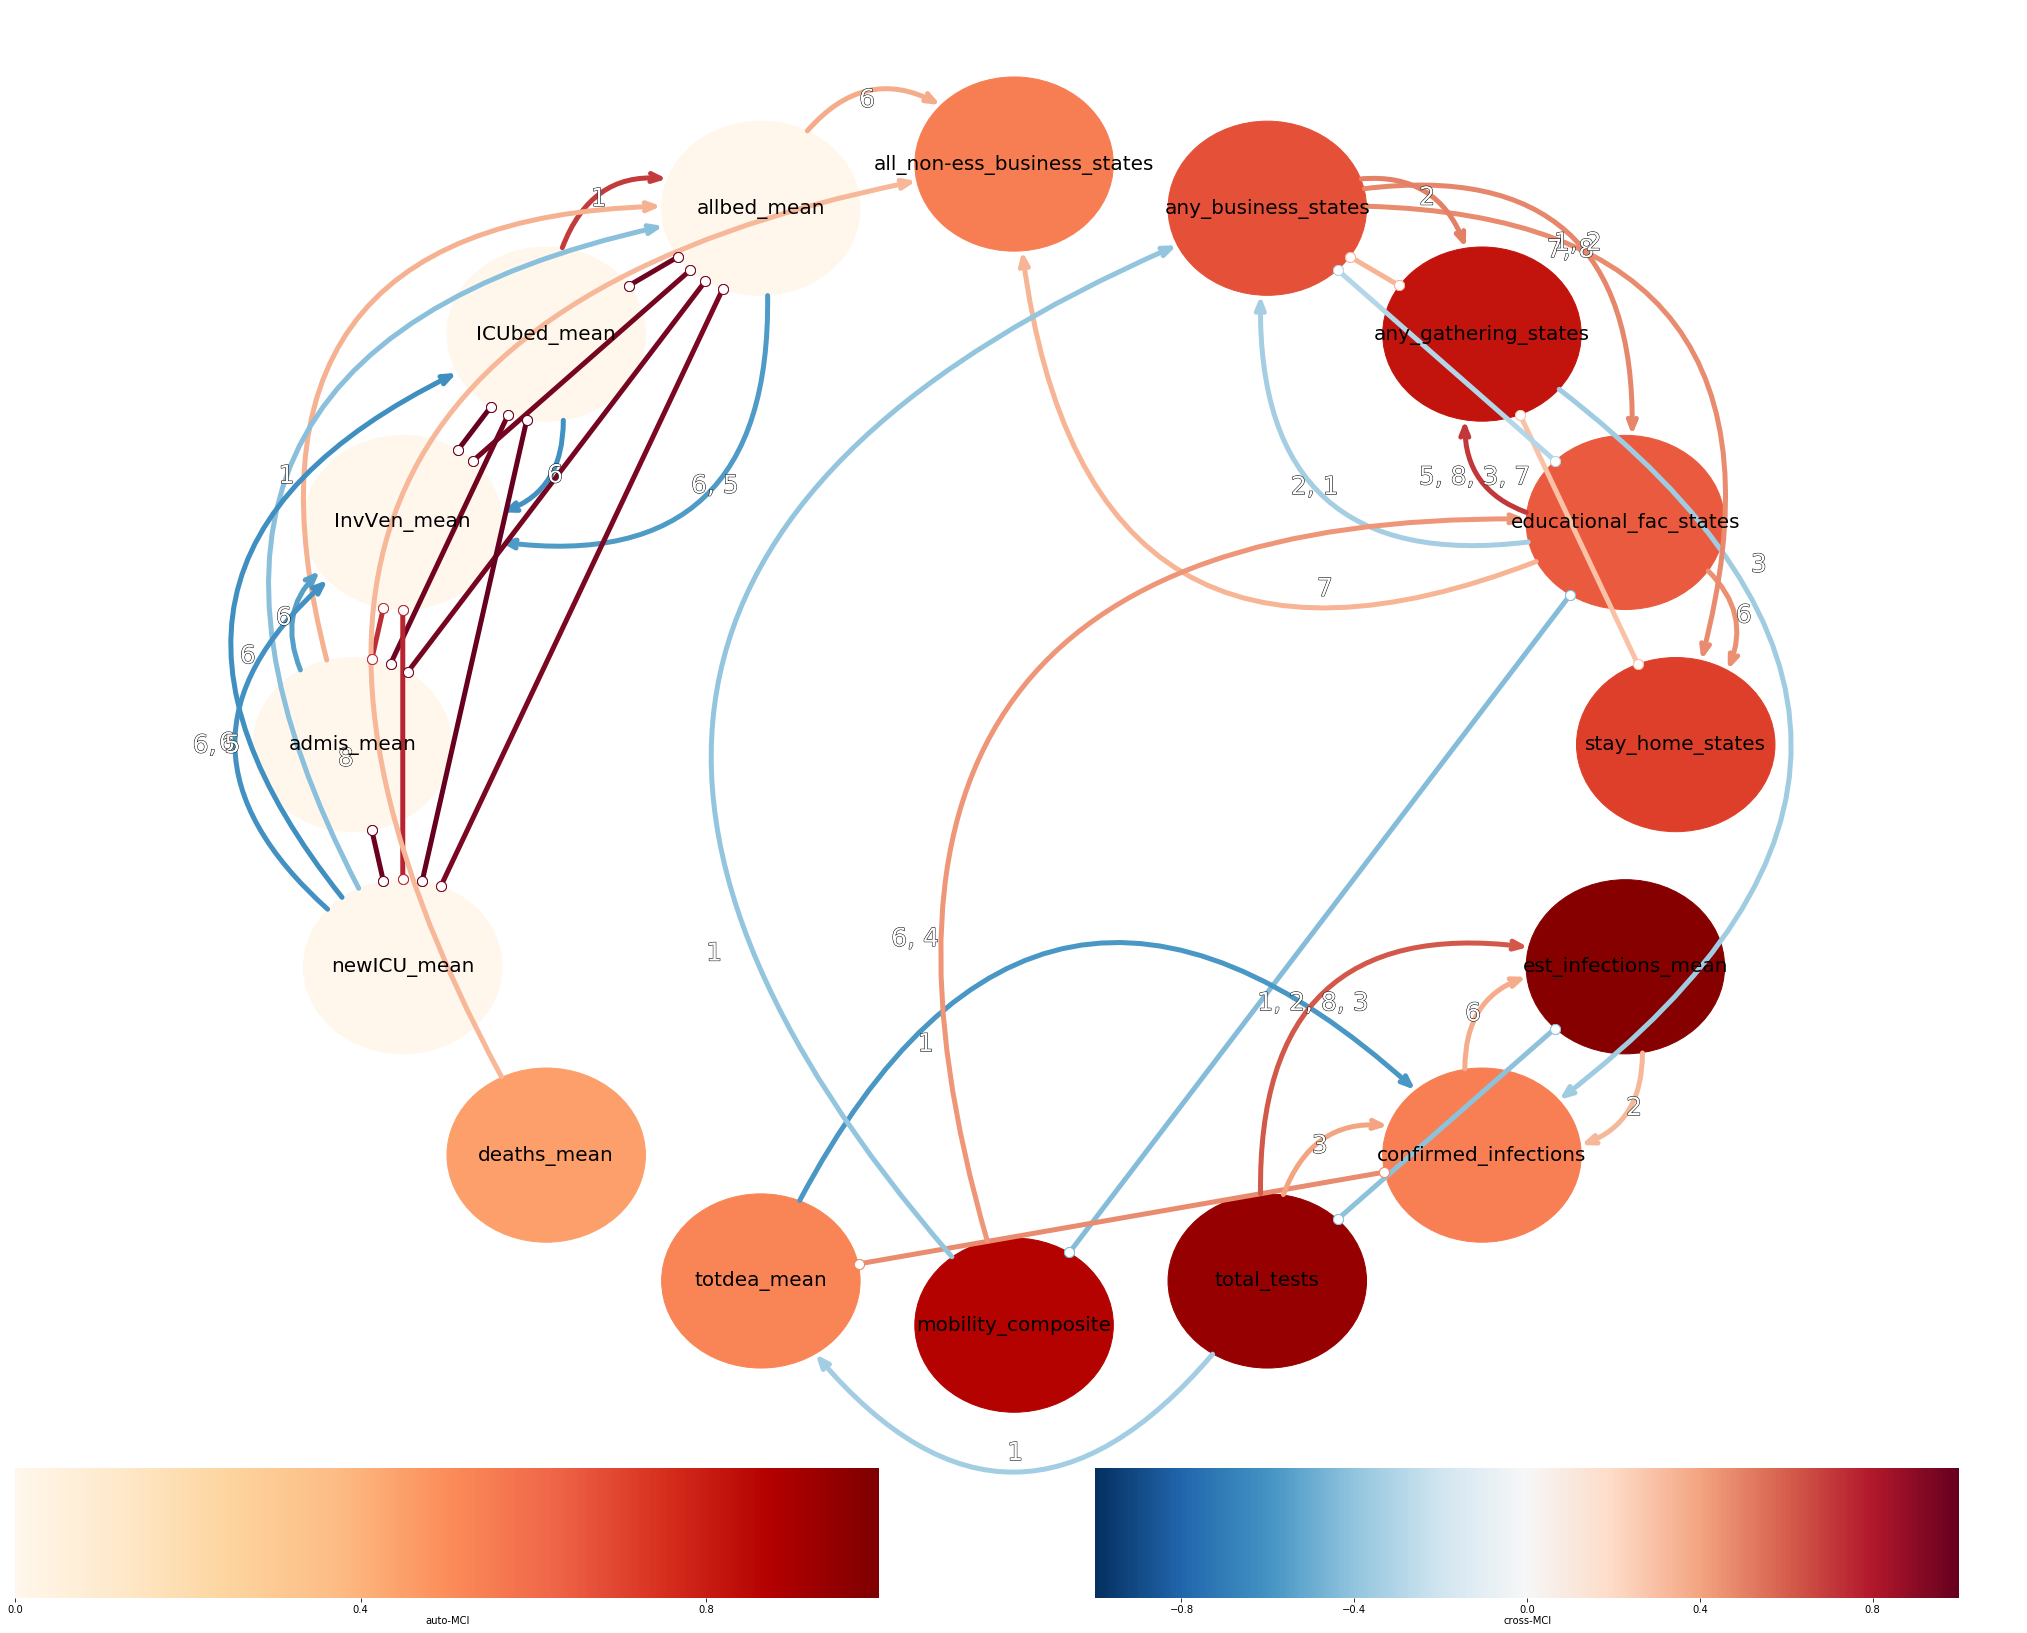

In [36]:
tp.plot_graph(
    figsize=(30,30),
    curved_radius = 0.75,
    link_label_fontsize = 25,
    node_label_size = 20,
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    arrow_linewidth=10
    );

plt.savefig("graph-plot.png")